In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [2]:
df = pd.read_csv('C:/Users/boti/Downloads/titanic-passengers (1).csv', sep=';')

df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Cabin'].fillna('G6',inplace=True)
df['Embarked'].fillna('S',inplace=True)
df.replace({'Sex':{'male': 1,'female':0}},inplace=True)

df["Survived"]=df["Survived"].map({'Yes': 1, "No": 0}) 

x= df[['Pclass','Age','SibSp','Parch','Fare','Sex']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  
logreg = LogisticRegression()
logreg.fit(x_train, y_train) 
y_pred  = logreg.predict(x_test) 
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

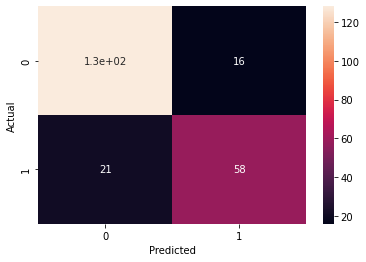

In [4]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)



0.8115330520393811


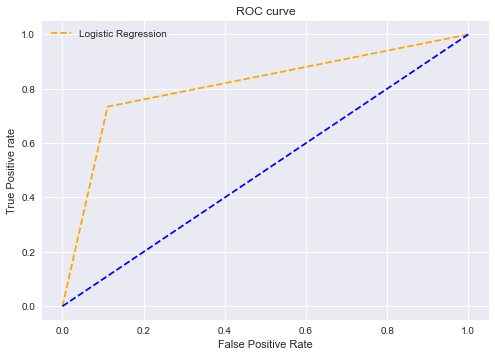

In [7]:
pr1, tpr1, thresh1 = roc_curve(y_test,y_pred, pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1)
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [8]:
knn=KNeighborsClassifier(n_neighbors=8) 
knn.fit(x_train,y_train) 
y_pred2=knn.predict(x_test)  
print('Acuuracy=',accuracy_score(y_pred2,y_test))

Acuuracy= 0.7354260089686099


Accuracy for k= 1 is: 0.71
Accuracy for k= 2 is: 0.71
Accuracy for k= 3 is: 0.72
Accuracy for k= 4 is: 0.72
Accuracy for k= 5 is: 0.7
Accuracy for k= 6 is: 0.72
Accuracy for k= 7 is: 0.72
Accuracy for k= 8 is: 0.73
Accuracy for k= 9 is: 0.74
Accuracy for k= 10 is: 0.76
Accuracy for k= 11 is: 0.75
Accuracy for k= 12 is: 0.76
Accuracy for k= 13 is: 0.74
Accuracy for k= 14 is: 0.72
Accuracy for k= 15 is: 0.7
Accuracy for k= 16 is: 0.73
Accuracy for k= 17 is: 0.72
Accuracy for k= 18 is: 0.74
Accuracy for k= 19 is: 0.73
Accuracy for k= 20 is: 0.73
Accuracy for k= 21 is: 0.72
Accuracy for k= 22 is: 0.74
Accuracy for k= 23 is: 0.75
Accuracy for k= 24 is: 0.73
Accuracy for k= 25 is: 0.72
Accuracy for k= 26 is: 0.76
Accuracy for k= 27 is: 0.73
Accuracy for k= 28 is: 0.72
Accuracy for k= 29 is: 0.71


Text(0, 0.5, 'Testing Accuracy')

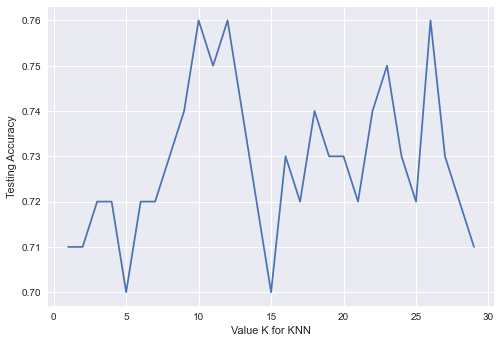

In [9]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred2=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred2,y_test),2))
    scores.append(round(accuracy_score(y_pred2,y_test),2))
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')
# we chose k = 8

score:0.8026905829596412
|--- feature_5 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_1 <= 3.00
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  3.00
|   |   |   |--- feature_4 <= 26.12
|   |   |   |   |--- feature_1 <= 56.00
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 13.25
|   |   |   |   |   |   |   |--- feature_4 <= 12.82
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_4 >  12.82
|   |   |   |   |   |   |   |   |--- feature_1 <= 37.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 26.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 21.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  21.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  26

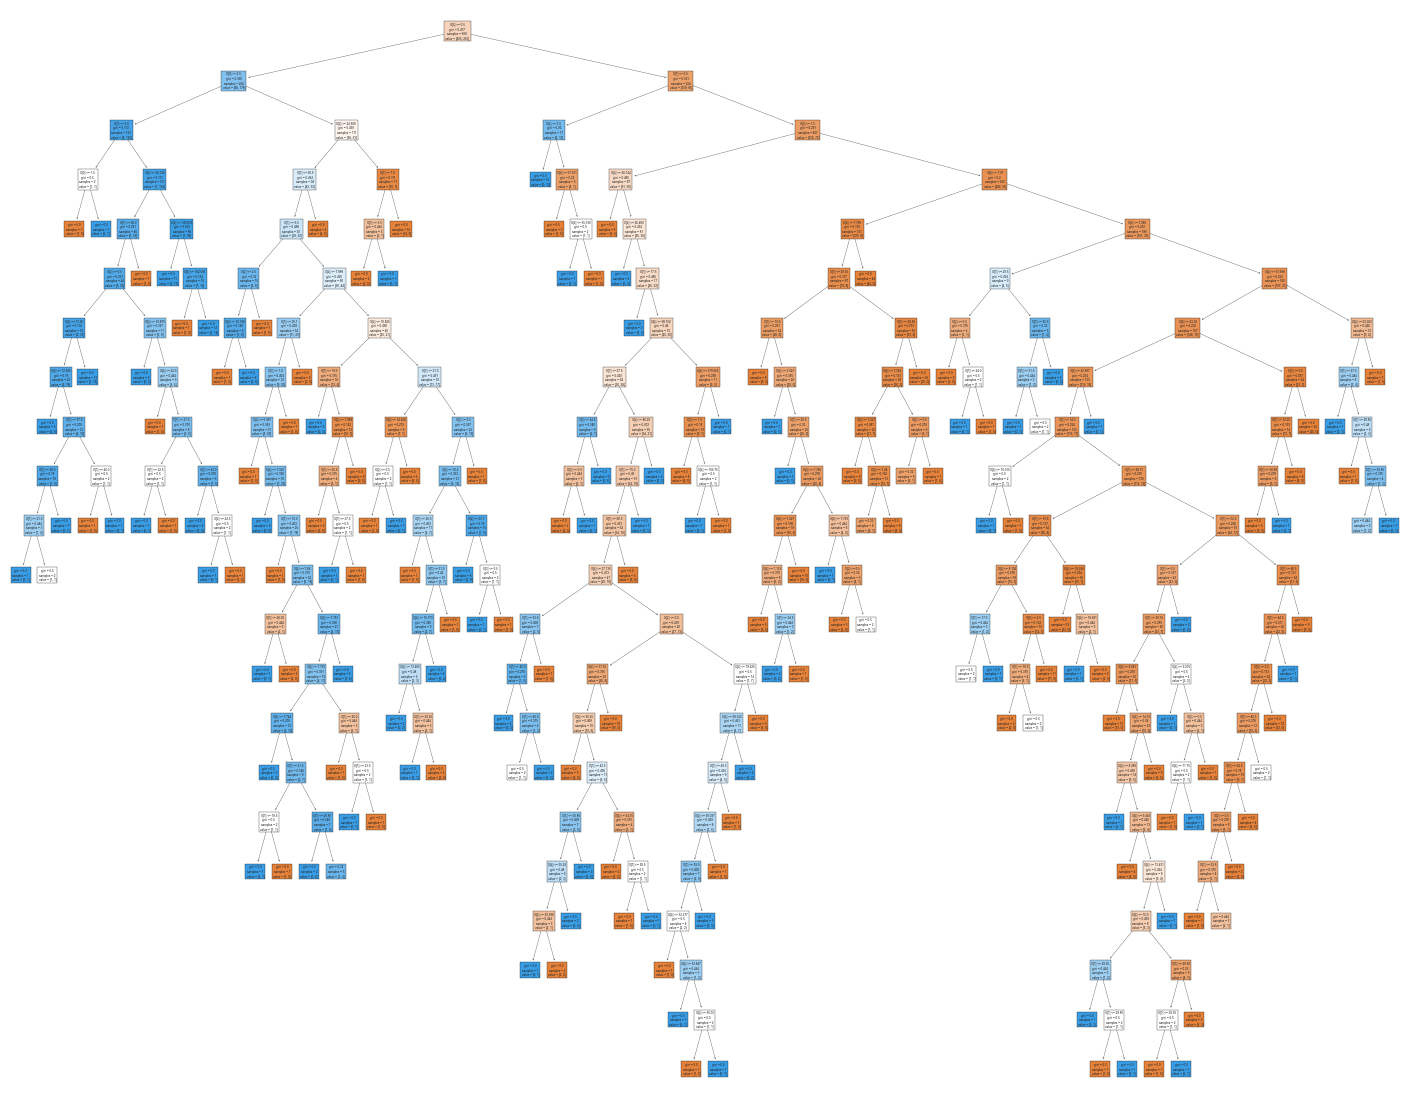

In [10]:
clf = tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))
text_representation = tree.export_text(clf)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

In [11]:
tree2 = DecisionTreeClassifier(criterion="entropy", splitter="random")
tree2.fit(x_train,y_train)
y_pred=tree2.predict(x_test)
score2=accuracy_score(y_test,y_pred)
score2

0.7847533632286996

In [12]:
clf1=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf1.fit(x_train, y_train)  #Training our model
y_pred=clf1.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.852017937219731


In [13]:
scores = cross_val_score(clf, x, y, cv=5)
scores2 = cross_val_score(knn, x, y, cv=5)
scores3 = cross_val_score(clf1, x, y, cv=5)
scores4 = cross_val_score(logreg, x, y, cv=5)
print(scores.mean())
print(scores2)
print(scores3)
print(scores4)

0.7665620488356035
[0.68715084 0.70224719 0.68539326 0.73033708 0.68539326]
[0.79329609 0.88202247 0.79213483 0.82022472 0.80337079]
[0.74860335 0.83707865 0.7752809  0.80337079 0.79213483]
